# Number Place Solver Demo

A demonstration ckeck configuration, training logs and inference

In [1]:
from lib.core import Trainer
from lib.config import load_config

## Visualize configurations

In [2]:
cfg = load_config('experiments/resnet.yaml')
trainer = Trainer(cfg=cfg)
print(trainer.cfg)

DATASET:
  BATCH_SIZE: 4
  NAME: NumberPlaceDataset
  NUM_CLASSES: 10
  ROOT: ../data/NumberPlaceDataset
  TOTAL_EPOCH: 10000
MODEL:
  CRITERION: CrossEntropyLoss
  INPUT_SIZE: (28, 28)
  LOG_DIR: ../logs
  NAME: ResNet-18
  OPTIMIZER: SGD
  PRETRAINED: https://download.pytorch.org/models/resnet18-f37072fd.pth
SCHEDULER:
  LR_MIN: 1e-06
  NAME: CosineLRScheduler
  WARMUP_LR_INIT: 1e-07
  WARMUP_PREFIX: True
  WARMUP_T: 1000


## Visualize train logs in TensorBoard

In [3]:
%load_ext tensorboard
%tensorboard  --logdir logs

# Inference

In [4]:
import cv2
import matplotlib.pyplot as plt
from lib.core import CutOuter, Detector, Solver

In [5]:
cutouter = CutOuter(root='./data/problem', name='example.png')

### Show the problem image 

Text(0.5, 1.0, 'input')

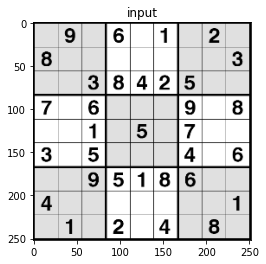

In [6]:
problem = cv2.cvtColor(cutouter.img, cv2.COLOR_BGR2RGB)
plt.imshow(problem, cmap='Greys')
plt.title('input', color='black')

In [7]:
from pathlib import Path
from PIL import Image

### Show cutouted problem image

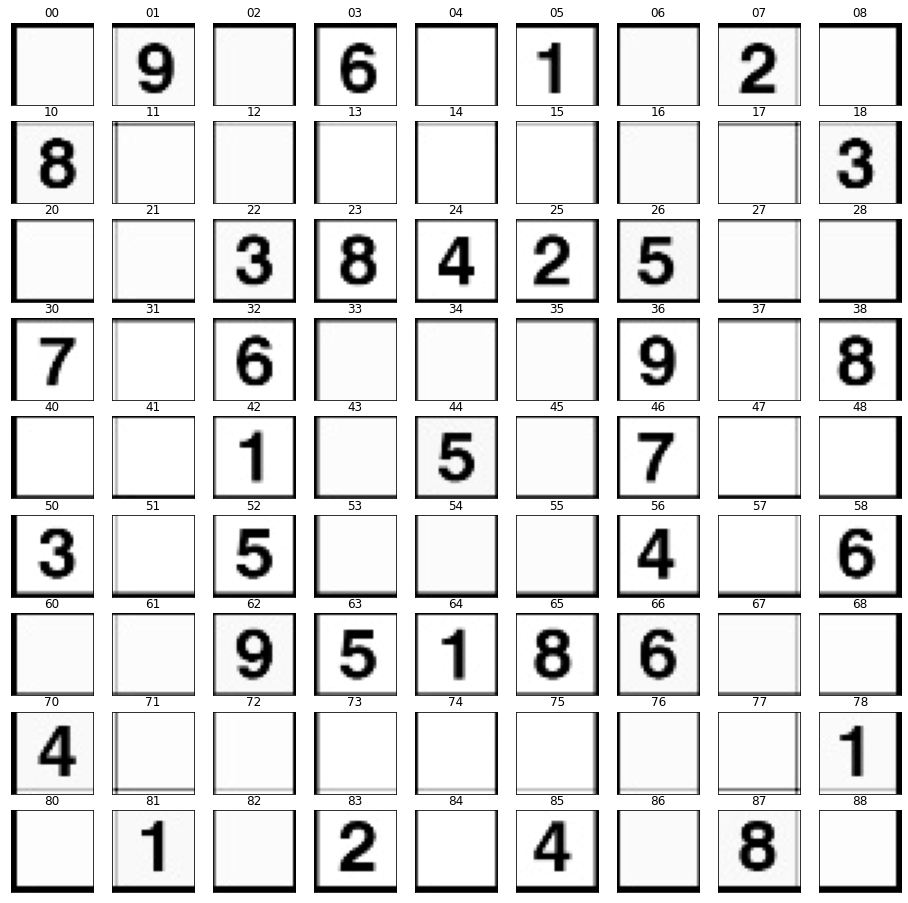

In [8]:
cols = rows = 9
fig = plt.figure(figsize=(16, 16))

for i, p in enumerate(sorted(cutouter.temp.glob('**/*.jpg'))):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(p.stem)
    img = Image.open(p)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

### Estimation from each cutouted image

In [9]:
detector = Detector(ckpt='./logs/NumberPlaceDataset/ckpt/last_ckpt.pth')
data = detector.detect(dir='./data/problem/example')

for d in data:
    print(*d)

0 9 0 6 0 1 0 2 0
8 0 0 0 0 0 0 0 3
0 0 3 8 4 2 5 0 0
7 0 6 0 0 0 9 0 8
0 0 1 0 5 0 7 0 0
3 0 5 0 0 0 4 0 6
0 0 9 5 1 8 6 0 0
4 0 0 0 0 0 0 0 1
0 1 0 2 0 4 0 8 0


### Solve the problem from the obtained data

In [10]:
solver = Solver()
result = solver.get_result(data)
for res in result:
    print(*res)

5 9 4 6 3 1 8 2 7
8 6 2 9 7 5 1 4 3
1 7 3 8 4 2 5 6 9
7 4 6 1 2 3 9 5 8
9 8 1 4 5 6 7 3 2
3 2 5 7 8 9 4 1 6
2 3 9 5 1 8 6 7 4
4 5 8 3 6 7 2 9 1
6 1 7 2 9 4 3 8 5


In [11]:
img = cutouter.img
height, width = img.shape

for i, col in enumerate(data):
    for j, item in enumerate(col):
        if int(item) == 0:
            cv2.putText(
                img,
                text=str(result[i][j]),
                org=(width // 9 * j + 9, height // 9 * (i + 1) - 9),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0),
                thickness=2,
                lineType=cv2.LINE_4
            )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Visualize the result

Text(0.5, 1.0, 'output')

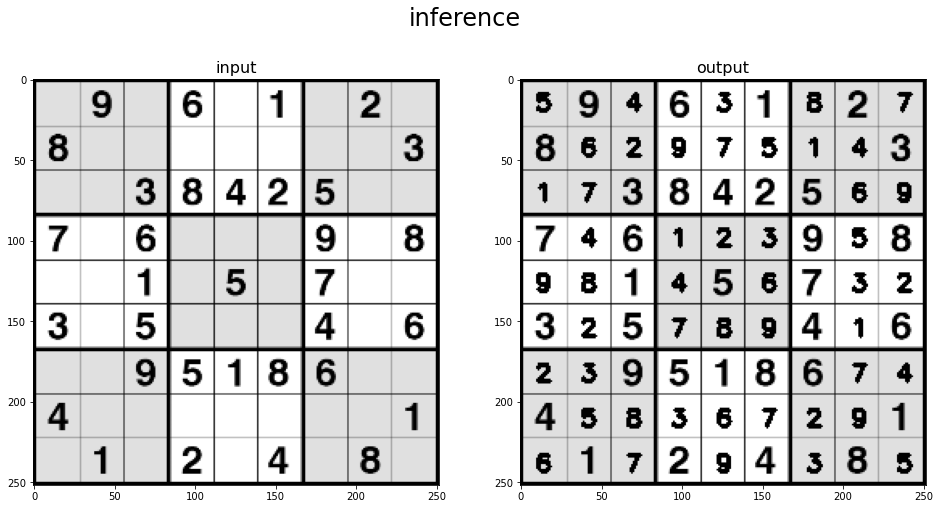

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle('inference', fontsize=24, color='black')

ax[0].imshow(problem, cmap='Greys')
ax[0].set_title('input', fontsize=16, color='black')

ax[1].imshow(img, cmap='Greys')
ax[1].set_title('output', fontsize=16, color='black')